# EDA on Penguins

In this notebook exercise, we will conduct simple EDA steps on the popular penguins dataset.

### Load the dataset

Dataset source: https://github.com/allisonhorst/palmerpenguins

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('penguins')

In [3]:
df.shape

(344, 7)

# Step 1 Understand the Features

You can find information about this dataset here: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

**Question: in your own words**:
1. describe each feature
2. mention its type (numeric or categorical)
3. write its name in Arabic

Note: use a Markdown cell.

there is 7 features :-

**1. species -صنف- (categorical) :** penguin species (Chinstrap, Adélie, or Gentoo)

**2. island -الجزيره- (categorical) :** island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)

**3. culmen_length_mm -طول الجزء العلوي من المنقار - (numeric) :** culmen length (mm)

**4. culmen_depth_mm (numeric) :**  culmen depth (mm)

**5. flipper_length_mm - الزعانف - (numeric) :** flipper length (mm)

**6. body_mass_g -كتله الجسم - (numeric) :** body mass (g)

**7. sex - الجنس- (categorical):** penguin sex               

Hint: you can attach an image to illustrate what the features are.

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" width="400">

# Step 2

- Have a look at the columns and their values (`head`, `sample`, `tail`)
- Look at the technical information (`info`)

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
df.sample()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
110,Adelie,Biscoe,38.1,16.5,198.0,3825.0,Female


In [6]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## **Step 3**

1. For each column, check and handle missing values; state your strategy and justify it. Examples:
    - Strategy: drop the column. Justification: ...?
    - Strategy: fill missing values. Justificaiton: ...?
    - Strategy: drop the row. Justification: ...?
1. Calculate count and percentage of missing values before handling them
1. Check and handle duplicated rows
1. Calculate the percentage of data loss after cleaning

In [8]:
# Calculate count of missing values
missing_count = df.isnull().sum()

# Calculate percentage of missing values
missing_percentage = (missing_count / len(df)) * 100

# Display the results
print(missing_count)
print(missing_percentage)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64


In [9]:
df['sex']=df['sex'].fillna('unknown')
## Since sex is a categorical feature and dropping rows might lead to significant data loss, it's better to impute it with a new category.

In [10]:
df.isnull().sum()

species              0
island               0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
sex                  0
dtype: int64

In [11]:
df = df.dropna(subset=['bill_length_mm','bill_depth_mm','flipper_length_mm' ,'body_mass_g'])
##dropping the rows is a reasonable approach, especially if the percentage of missing values is small.

In [12]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [13]:
df.duplicated().sum()## there is no duplacate

0

In [14]:
num_rows_before = len(df)  # Before dropping rows
df = df.dropna(subset=['bill_length_mm','bill_depth_mm','flipper_length_mm' ,'body_mass_g'])
num_rows_after = len(df)   # After dropping rows

data_loss_percentage = ((num_rows_before - num_rows_after) / num_rows_before) * 100
print("Data loss percentage:", data_loss_percentage)

Data loss percentage: 0.0


# Step 4

#### Data types conversion
- We shall convert the string types to `category` to preserve memory
- numeric types can be stored in less precision: `float32`

In [15]:
mem_usage_before = df.memory_usage(deep=True)

In [16]:
# convert categotical types
df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')

In [17]:
# convert numerical types
df['bill_depth_mm'] = df['bill_depth_mm'].astype('float32')
df['bill_length_mm'] = df['bill_length_mm'].astype('float32')
df['flipper_length_mm'] = df['flipper_length_mm'].astype('float32')
df['body_mass_g'] = df['body_mass_g'].astype('float32')

Calculate memory saved after type conversion

In [18]:
# mem_usage_after = ...?
mem_usage_after = df.memory_usage(deep=True)

In [19]:
print('memory saved:', (mem_usage_before - mem_usage_after).sum() // 1024, 'KB')

memory saved: 66 KB


# Step 5

#### Detect inconsistency in categorical values

The categorical columns should be checked for any inconsistencies. For example. We look for lowercase, uppercase, or inconsistent use of codes (e.g., "M", "F") with non-codes (e.g., "Male", "Female")  in the `sex` column.

- hint: use `.unique()` to check the number of unique values in a column
- you can also use: `.value_counts()` to check the frequency of each value in a column

In [20]:
# Check unique values in 'sex' column
print(df['sex'].unique())

# Check frequency of each value in 'sex' column
print(df['sex'].value_counts())

# Check unique values in 'island' column
print(df['island'].unique())

# Check frequency of each value in 'island' column
print(df['island'].value_counts())

# Check unique values in 'species' column
print(df['species'].unique())

# Check frequency of each value in 'species' column
print(df['species'].value_counts())

['Male', 'Female', 'unknown']
Categories (3, object): ['Female', 'Male', 'unknown']
sex
Male       168
Female     165
unknown      9
Name: count, dtype: int64
['Torgersen', 'Biscoe', 'Dream']
Categories (3, object): ['Biscoe', 'Dream', 'Torgersen']
island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64
['Adelie', 'Chinstrap', 'Gentoo']
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']
species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64


# Step 6: Univariate Analysis

- Separate numerical from categorical columns (hint; use `df.select_dtypes()`)
- Look at the statistical information for each:
    - `df_num.describe().T`
    - `df_cat.describe().T`

In [21]:
df_num = df.select_dtypes(include=['float32'])
df_cat = df.select_dtypes(include=['category'])

# Numerical features
display(df_num.describe().T)

# Categorical features
display(df_cat.describe().T)

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921932,5.459584,32.099998,39.225,44.450001,48.500000,59.599998
bill_depth_mm,342.0,17.151171,1.974793,13.100000,15.600,17.299999,18.700001,21.500000
flipper_length_mm,342.0,200.915207,14.061714,172.000000,190.000,197.000000,213.000000,231.000000
body_mass_g,342.0,4201.754395,801.954529,2700.000000,3550.000,4050.000000,4750.000000,6300.000000


,count,unique,top,freq
species,342,3,Adelie,151
island,342,3,Biscoe,167
sex,342,3,Male,168


Use charts to plot `value_counts()` categorical variables:
1. plot `species` using bar plot
1. plot `island` using pie chart
1. plot `sex` using horizontal bar plot

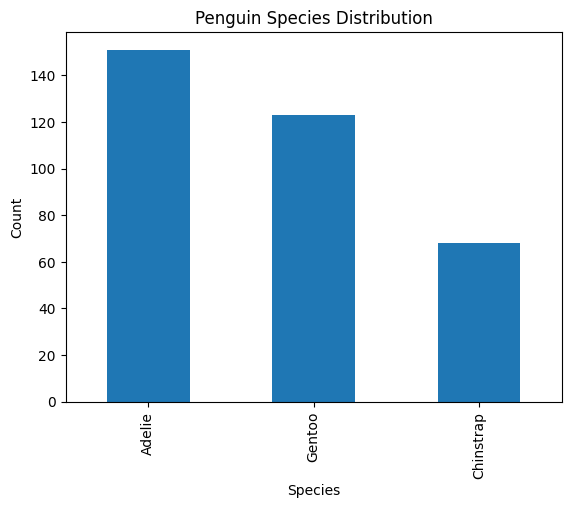

In [22]:
import matplotlib.pyplot as plt

# Bar plot for 'species'
df['species'].value_counts().plot(kind='bar')
plt.title('Penguin Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


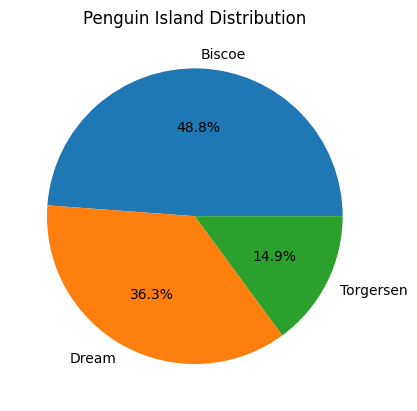

In [23]:
# Pie chart for 'island'
df['island'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Penguin Island Distribution')
plt.ylabel('')
plt.show()

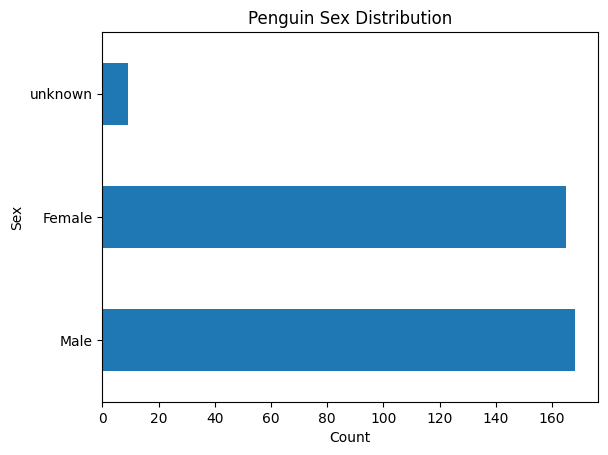

In [24]:
# Horizontal bar plot for 'sex'
df['sex'].value_counts().plot(kind='barh')
plt.title('Penguin Sex Distribution')
plt.xlabel('Count')
plt.ylabel('Sex')
plt.show()

Plot numerical variables:

1. Boxplot: `bill_length_mm`
1. Histogram: `bill_depth_mm`
1. Boxplot: `flipper_length_mm`
1. Histogram: `body_mass_g`

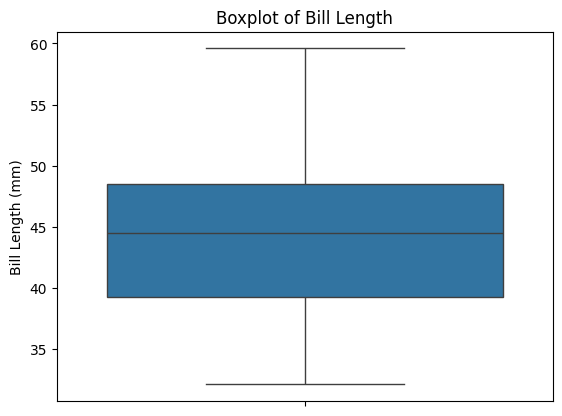

In [25]:
# Boxplot for 'bill_length_mm'
plt.figure()
sns.boxplot(data=df, y='bill_length_mm')
plt.title('Boxplot of Bill Length')
plt.ylabel('Bill Length (mm)')
plt.show()


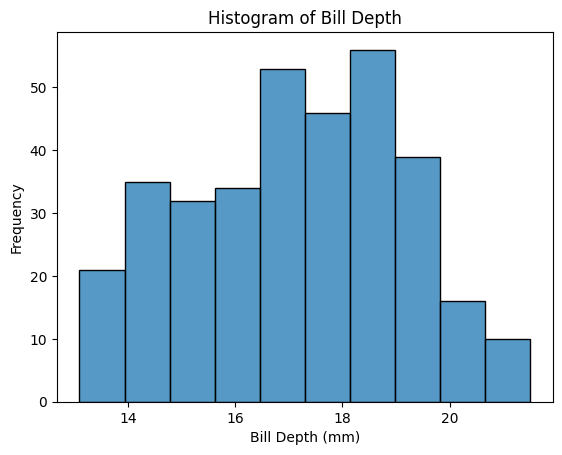

In [26]:
# Histogram for 'bill_depth_mm'
plt.figure()
sns.histplot(data=df, x='bill_depth_mm')
plt.title('Histogram of Bill Depth')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Frequency')
plt.show()

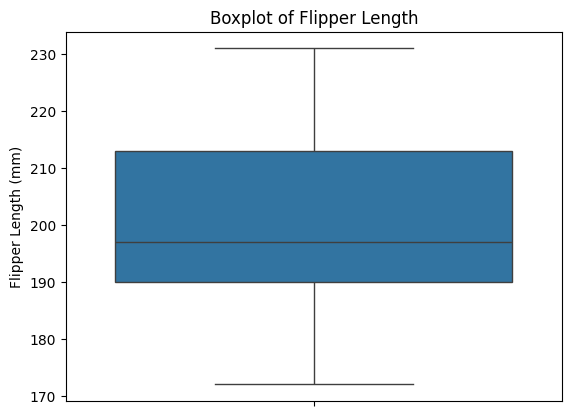

In [27]:
# Boxplot for 'flipper_length_mm'
plt.figure()
sns.boxplot(data=df, y='flipper_length_mm')
plt.title('Boxplot of Flipper Length')
plt.ylabel('Flipper Length (mm)')
plt.show()

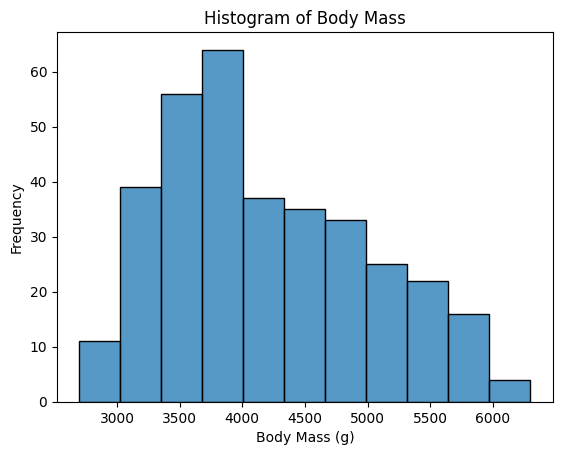

In [28]:
# Histogram for 'body_mass_g'
plt.figure()
sns.histplot(data=df, x='body_mass_g')
plt.title('Histogram of Body Mass')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.show()

## Step 7: Bivariate Analysis

#### Correlation between numerical features

Let's find out if there is any correlation between numerical features.

- Hint: you can use the `df.corr()` to find the correlation matrix.
- Hint: you can use `sns.heatmap()` to plot the correlation matrix

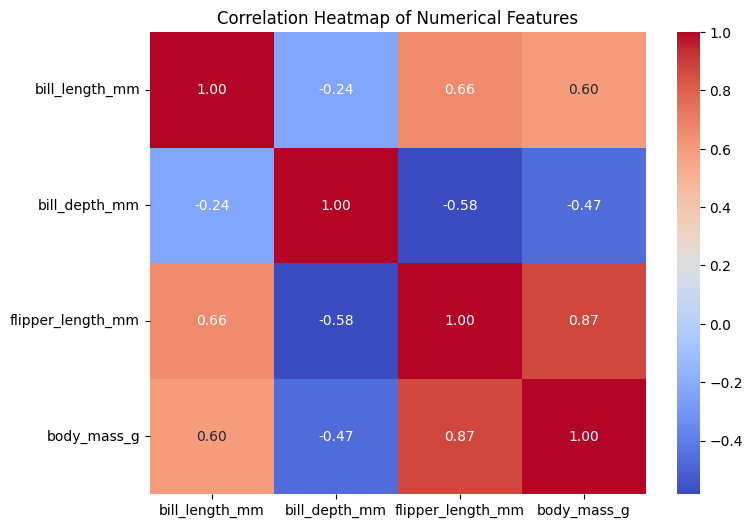

In [29]:
# Calculate the correlation matrix
corr_matrix = df.select_dtypes(include=['float32']).corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Write down your observations based on the correlation heatmap.

Observations:

as you see in heatmap there is

**strong Positive Correlations:**

Flipper Length and Body Mass (0.87):
Penguins with longer flippers tend to exhibit higher body mass.
Bill Length and Body Mass (0.59):
Penguins with longer bills generally show higher body mass.

**Moderate Positive Correlation:**

Bill Length and Flipper Length (0.66):
There is a moderate positive correlation, indicating that penguins with longer bills tend to have longer flippers.

**Negative Correlation:**

Bill Depth and Flipper Length (-0.58):
Penguins with deeper bills tend to have relatively shorter flippers.

**Weak Correlations:**

Bill Depth and Body Mass (-0.47):
The correlation is relatively weak, suggesting a less pronounced relationship between bill depth and body mass.
Bill Depth and Bill Length (-0.24):
The correlation is weak, indicating a subtle relationship between bill depth and bill length.

### Feature Engineering

- We might try adding the feature `bill_size` which is the product of `bill_length` and `bill_depth` to see if it has any significance in the model.
- We might also try `bill_ratio` which is the ratio of `bill_length` to `bill_depth` to see if it has any significance in the model.

In [30]:
df['bill_size'] = df['bill_length_mm'] * df['bill_depth_mm']
df['bill_ratio'] = df['bill_length_mm'] / df['bill_depth_mm']

Let's look at the correlation to see whether the newly created features are better.

<Axes: >

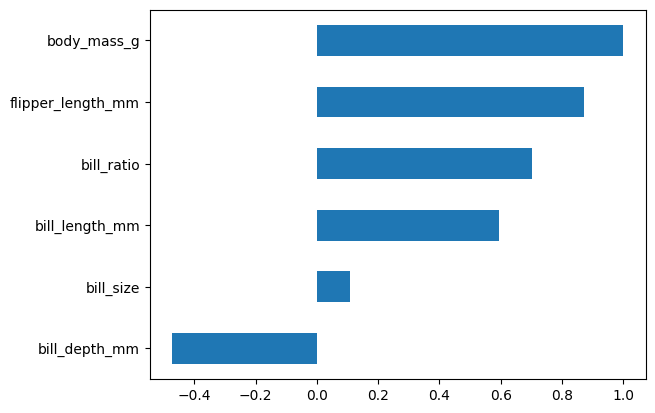

In [31]:
# This plots the correlation values for a specific column
# which is usually what we are interested in
corr = df.select_dtypes(include=['float32']).corr()
corr['body_mass_g'].sort_values().plot.barh()

for the newly created features

- there is a moderate Positive Correlation between bill_ratio and the body_mass_g
(0.6) so this is show that penguins with highe bill _ratio bills tend to have a high body_mass_g.
- for bill_size it's dose not have that strong relation with body_mass_g
cause the Correlation (0.2)  
